# **Decision Tree**


Decision Tree atau Pohon Keputusan adalah salah satu algoritma supervised learning yang paling populer dalam machine learning. Algoritma ini bekerja dengan cara membangun model prediksi dalam bentuk struktur pohon. Setiap simpul (node) pada pohon merepresentasikan sebuah “tes” pada suatu atribut (fitur), setiap cabang merepresentasikan hasil dari tes tersebut, dan setiap daun (leaf node) merepresentasikan label kelas atau nilai target.

Tujuan utama dari Decision Tree adalah untuk membuat serangkaian aturan keputusan (rules) yang dapat digunakan untuk memprediksi kelas atau nilai dari data baru. Karena strukturnya yang mirip diagram alir, model ini sangat mudah diinterpretasikan dan dipahami oleh manusia.

## 1. **Cara Kerja Decision Tree**

Decision Tree bekerja dengan cara mempartisi atau membagi dataset secara rekursif menjadi subset-subset yang lebih kecil dan lebih homogen berdasarkan fitur-fitur yang ada. Proses pembagian ini dilakukan dengan memilih fitur dan *threshold* (nilai ambang) terbaik yang dapat memisahkan data ke dalam kelas-kelas seakurat mungkin.

Kualitas pemisahan diukur menggunakan metrik seperti **Entropy** dan **Information Gain**.

  * **Entropy**: Mengukur tingkat ketidakpastian atau "keacakan" dalam sebuah set data. Nilai entropy adalah 0 jika semua data dalam satu set termasuk dalam kelas yang sama (murni), dan bernilai maksimum jika data terdistribusi secara merata di semua kelas.
  
  Formula Entropy:
  
  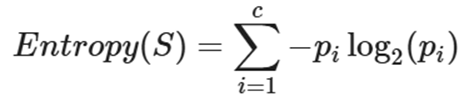

  * **Information Gain**: Mengukur seberapa besar penurunan entropy yang terjadi setelah data dibagi berdasarkan suatu fitur. Fitur dengan Information Gain tertinggi akan dipilih sebagai pemecah (splitter) pada node tersebut.
  
  Formula Information Gain:
  
  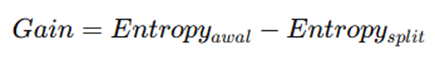

Proses ini terus berlanjut hingga kondisi berhenti tercapai, misalnya:

  * Semua data pada sebuah node sudah termasuk dalam kelas yang sama.
  * Tidak ada fitur lagi yang bisa digunakan untuk membagi data.
  * Kedalaman maksimum pohon telah tercapai.

## 2. **Contoh Perhitungan Manual**

**Dataset**

| Nilai | Penghasilan (jt) | Beasiswa |
|-------|------------------|----------|
| 65    | 2.5              | Tidak    |
| 70    | 3                | Tidak    |
| 72    | 3.5              | Ya       |
| 75    | 4                | Ya       |
| 78    | 4.5              | Ya       |
| 80    | 3                | Ya       |
| 82    | 2.5              | Tidak    |
| 85    | 3.5              | Ya       |
| 88    | 2                | Tidak    |
| 90    | 4                | Ya       |
| 92    | 3                | Tidak    |
| 93    | 4.5              | Ya       |
| 94    | 2                | Tidak    |
| 95    | 3                | Tidak    |
| 96    | 4.5              | Ya       |


### **Langkah 1: Hitung Entropy Total**

Distribusi kelas:

* Ya = 8
* Tidak = 7
* total = 15

Probabilitas:

$$
P(Ya) = \frac{8}{15} = 0.533,\quad P(Tidak) = \frac{7}{15} = 0.466,
$$

Entropy total:

$$
E_{total} = - \sum p_i \log_2 p_i = -(0.533 \log_2 0.533 + 0.466 \log_2 0.466) \approx 0.996
$$

---

### **Langkah 2: Uji Threshold dan Hitung Information Gain untuk Fitur ‘Nilai’**


#### **Perhitungan untuk Threshold: **Nilai ≤ 82.5**

**Split Data:**

* Kiri (Nilai ≤ 7.5):

  7 data:
  Kelas: Ya=4, Tidak=3

  Probabilitas:

  $$
  P(Ya) = \frac{4}{7} = 0.571, \quad P(Tidak) = \frac{3}{7} = 0.428
  $$

  Entropy kiri:

  $$
  E_{kiri} = -(0.571 \log_2 0.571 + 0.428 \log_2 0.428) \approx 0.985
  $$

* Kanan (Nilai > 82.5):

  8 data:
  Kelas: Ya=4, Tidak=4

  Entropy kanan:

  $$
  E_{kanan} = -(0.5 \log_2 0.5 + 0.5 \log_2 0.5) \approx 1
  $$


**Bobot Entropy Gabungan:**

$$
E_{split} = \frac{7}{15} \times 0.985 + \frac{8}{15} \times 1 = 0.993
$$

**Information Gain:**

$$
IG = E_{total} - E_{split} = 0.996 - 0.993 = 0.003
$$



### **Langkah 3: Uji Threshold dan Hitung Information Gain untuk Fitur ‘Penghasilan’**

### Contoh Perhitungan Threshold: **Penghasilan ≤ 3.25**

**Split Data:**

* Kiri (Penghasilan ≤ 3.25): 8 data
  Kelas: Ya=1, Tidak=7

  Probabilitas:

  $$
  P(Tidak) = \frac{7}{8} = 0.875, \quad P(Ya) = \frac{1}{8} = 0.125
  $$

  Entropy kiri:

  $$
  E_{kiri} = -(0.875 \log_2 0.875 + 0.125 \log_2 0.125) \approx 0.543
  $$

* Kanan (Penghasilan > 3): 7 data
  Kelas: Ya=7 (murni)

  Entropy kanan:

  $$
  E_{kanan} = 0
  $$


**Bobot Entropy Gabungan:**

$$
E_{split} = \frac{8}{15} \times 0.543 + \frac{7}{15} \times 0 = 0.289
$$

**Information Gain:**

$$
IG = 0.996 - 0.289 = 0.706
$$

## 3. **Perbandingan dengan Library Scikit-learn**

membuat model yang sama menggunakan library `scikit-learn` di Python untuk memvalidasi hasil perhitungan manual.





,Nilai,Penghasilan,Beasiswa
0,65,2.5,0
1,70,3.0,0
2,72,3.5,1
3,75,4.0,1
4,78,4.5,1
5,80,3.0,1
6,82,2.5,0
7,85,3.5,1
8,88,2.0,0
9,90,3.0,1


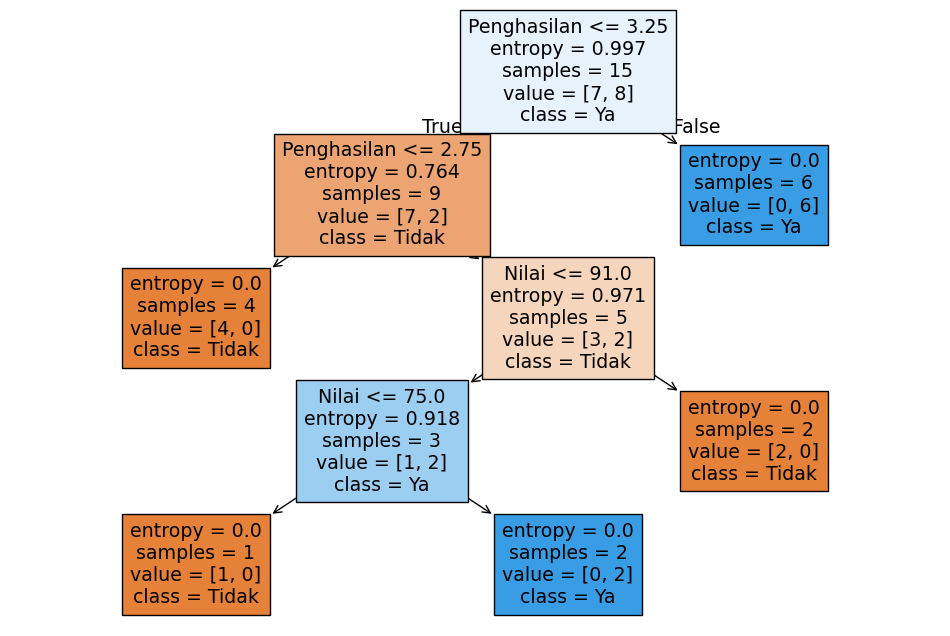

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Data
data = {
    'Nilai': [65, 70, 72, 75, 78, 80, 82, 85, 88, 90, 92, 93, 94, 95, 96],
    'Penghasilan': [2.5, 3, 3.5, 4, 4.5, 3, 2.5, 3.5, 2, 3, 3, 4.5, 2, 3, 4.5],
    'Beasiswa': ['Tidak', 'Tidak', 'Ya', 'Ya', 'Ya', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Tidak', 'Ya']
}

# Buat DataFrame
df = pd.DataFrame(data)

# Label encoding untuk target
df['Beasiswa'] = df['Beasiswa'].map({'Ya': 1, 'Tidak': 0})

# Fitur dan target
X = df[['Nilai', 'Penghasilan']]
y = df['Beasiswa']

# Buat decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)

display(HTML(df.to_html()))

# Plot pohon
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Nilai', 'Penghasilan'], class_names=['Tidak', 'Ya'], filled=True)
plt.show()

In [8]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

data_uji = pd.DataFrame({
    'Nilai': [83, 76],
    'Penghasilan': [4.0, 2.5]
})

prediksi = model.predict(data_uji)
hasil = pd.DataFrame(data_uji)
hasil['Prediksi Beasiswa'] = ['Ya' if p == 1 else 'Tidak' for p in prediksi]

print(hasil)

   Nilai  Penghasilan Prediksi Beasiswa
0     83          4.0                Ya
1     76          2.5             Tidak
